In [10]:
import matplotlib.pyplot as plt
import numpy as np
from plots import *
import scipy.io
import scipy.signal as signal
# filepath = "C:\\Users\\Owner\\OneDrive\\Documents\\GitHub\\SOAEpeaks\\Data\\"
# wf_title = 'ACfls27rearSOAEwfD01.txt'
# wf = np.loadtxt(filepath + wf_title)
# sr = 44100
filepath = "C:\\Users\\Owner\\OneDrive\\Documents\\GitHub\\SOAEpeaks\\Data\\"
wf_title = 'anole_AC6rearSOAEwfB1.mat'
mat = scipy.io.loadmat(filepath + wf_title)
wf = np.squeeze(mat['wf'])
sr=44100


In [12]:
# highpass filter
cutoff_freq = 150
order = 2
sos = signal.butter(order, cutoff_freq,'hp',fs=sr,output='sos')
wf_filtered = signal.sosfilt(sos, wf)

# coherence
tau = 0.02322
xi = 0.00580

d_lizard = get_coherence(wf, sr, t_win=tau, t_shift=xi, ref_type="next_win", hann=False, return_all=True)
coherence = d_lizard["coherence"]
phase_diffs = d_lizard["phase_diffs"]
f = d_lizard["freq_ax"]

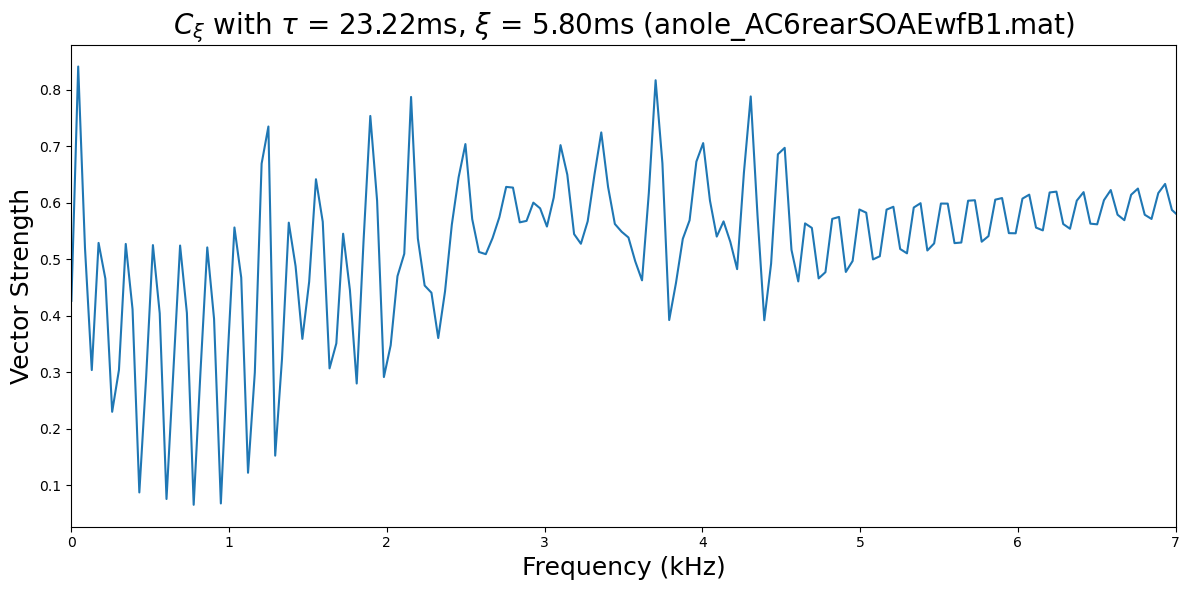

In [13]:
plt.figure(figsize=(12,6))
plt.title(r"$C_{\xi}$ with "+ r"$\tau$ = " + f"{tau*1000:.2f}ms, " + r"$\xi$ = " + f"{xi*1000:.2f}ms" + f" ({wf_title})", fontsize=20)
plt.ylabel("Vector Strength", fontsize=18)
plt.xlabel("Frequency (kHz)", fontsize=18)
plt.plot(f/1000, coherence)
plt.xlim(0, 7)
plt.tight_layout()
plt.show()

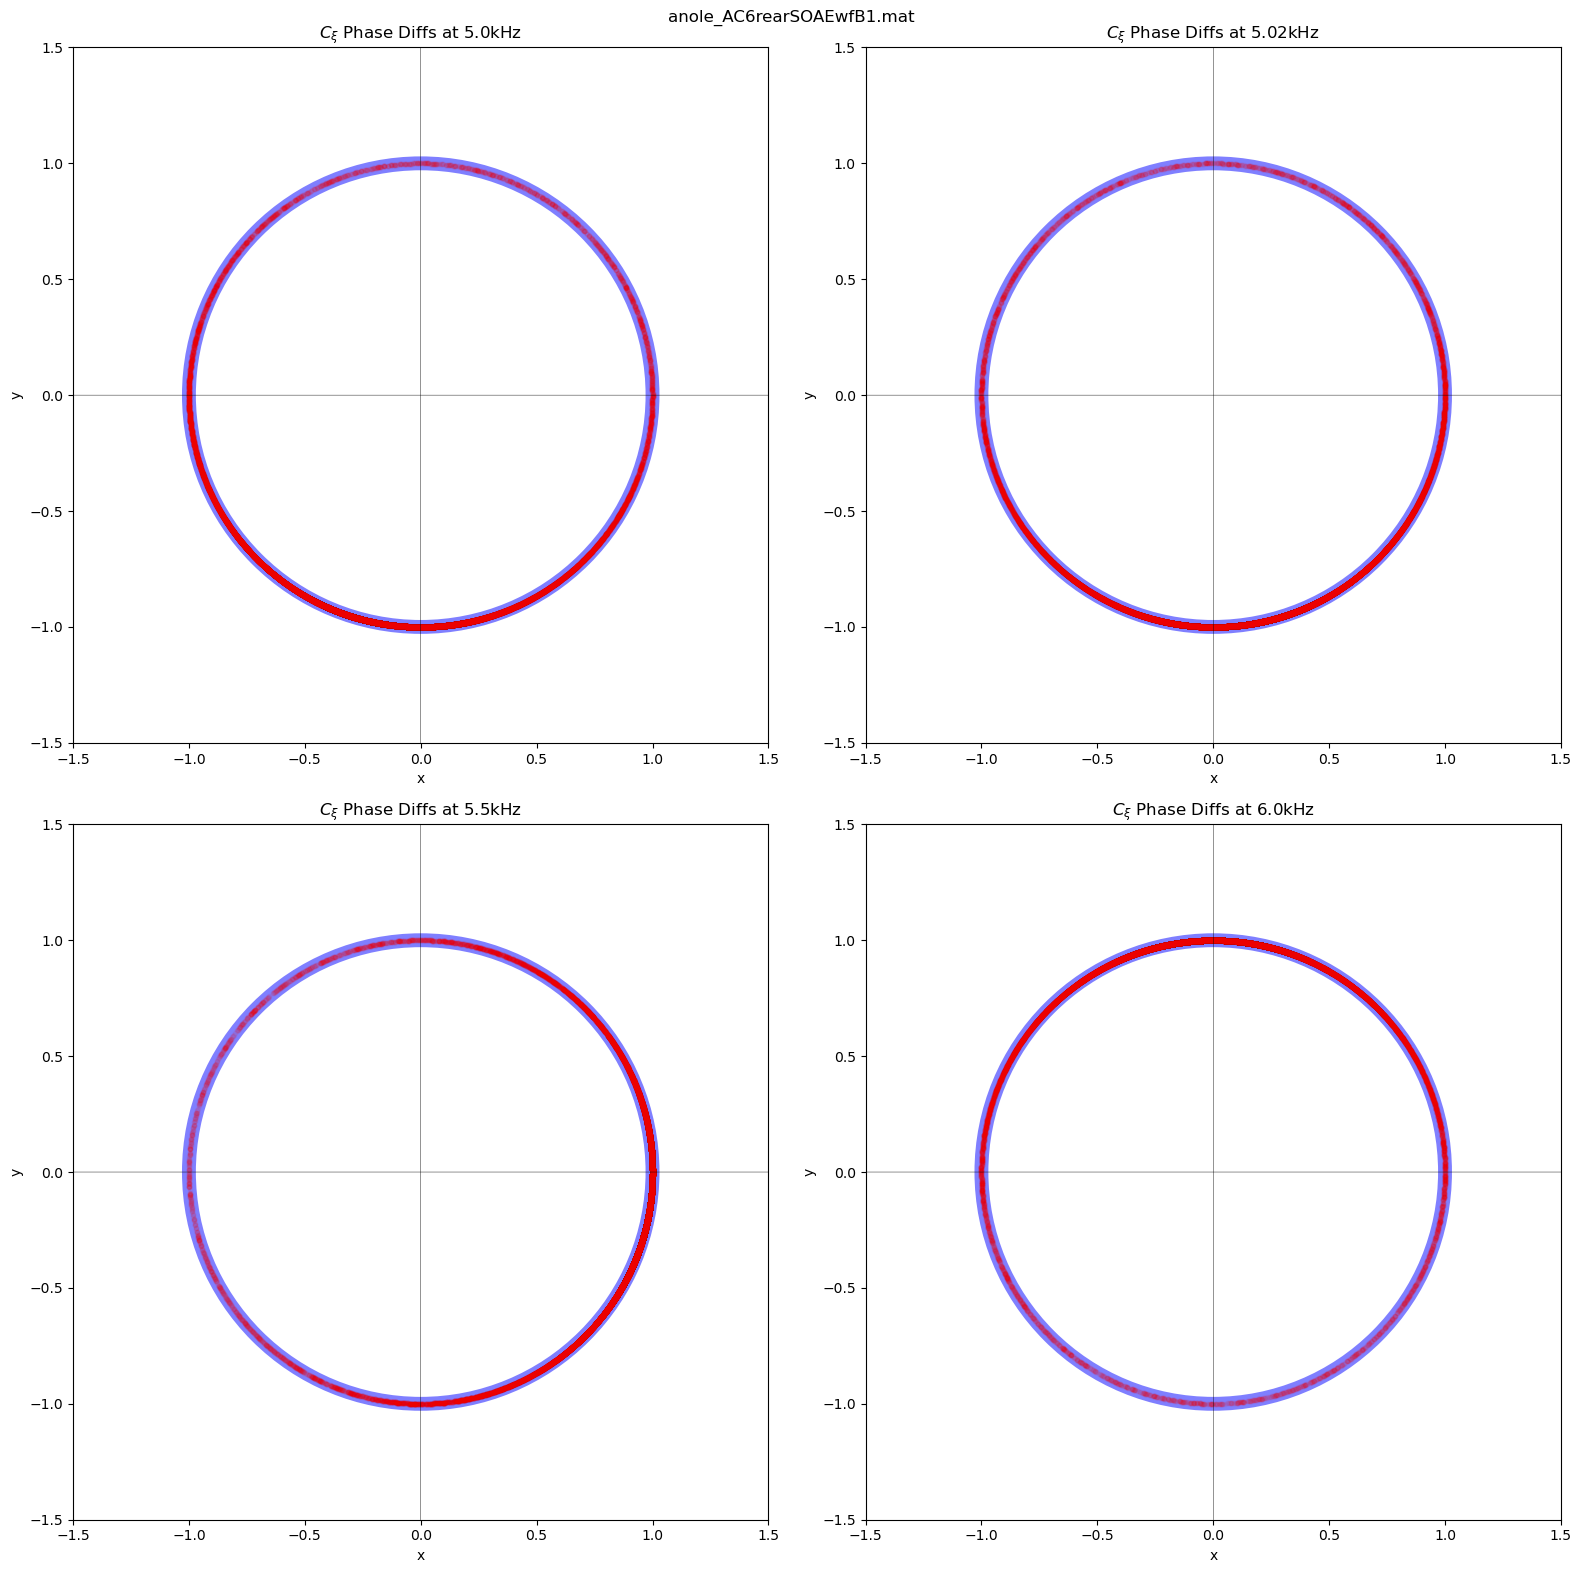

In [87]:
plt.figure(figsize=(16, 16))

phase_diffs = d_lizard["phase_diffs"]
for i, f_min in enumerate([5000, 5020, 5500, 6000]):
    f_min_idx = (np.abs(f - f_min)).argmin()  # find index of closest value to f - f_min
    angles = phase_diffs[:, f_min_idx].flatten()
    # Compute Cartesian coordinates (x, y) on the unit circle
    x = np.cos(angles)
    y = np.sin(angles)


    # Plot the circle
    circle = plt.Circle((0, 0), 1, color='blue', fill=False, linewidth=10, alpha=0.5)  # Unit circle
    plt.subplot(2, 2, i + 1)
    ax = plt.gca()
    ax.add_patch(circle)

    # Plot the points
    ax.scatter(x, y, color='red', label='Points on Circle', s=10, alpha=0.05)
    ax.plot(np.zeros(len(angles)), np.linspace(-1.5, 1.5, len(angles)), color='black', lw=0.3)
    ax.plot(np.linspace(-1.5, 1.5, len(angles)), np.zeros(len(angles)), color='black', lw=0.3)

    # Set equal scaling so the circle isn't distorted
    ax.set_aspect('equal')

    # Add labels and legend
    ax.set_xlim(-1.5, 1.5)
    ax.set_ylim(-1.5, 1.5)
    ax.set_xlabel('x')
    ax.set_ylabel('y')

    # ax.set_title(r"$C_\xi$ Phase Diffs" + f" from {f_min/1000}kHz to {f_max/1000}kHz")
    ax.set_title(r"$C_\xi$ Phase Diffs" + f" at {f_min/1000}kHz")

# Show the plot
plt.suptitle('anole_AC6rearSOAEwfB1.mat')
plt.tight_layout()
plt.show()

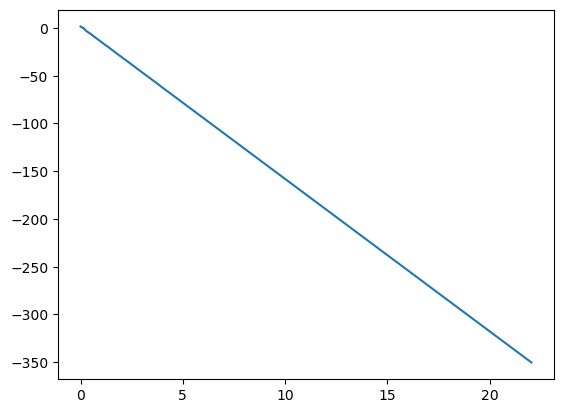

In [90]:
_, avg_phase_diff = get_avg_vector(phase_diffs)
avg_phase_diff_unwrapped = np.unwrap(avg_phase_diff)
plt.plot(f/1000, avg_phase_diff_unwrapped)
plt.show()

In [91]:
# RANDOM NOISE
tau = 0.04096
xi = 0.00256

wf_random = np.random.normal(0, 1, len(wf))

d_noise = get_coherence(wf_random, sr, t_win=tau, t_shift=xi, ref_type="next_win", hann=False, return_all=True)
coherence = d_noise["coherence"]
f = d_noise["freq_ax"]

d_noise_half_xi = get_coherence(wf_random, sr, t_win=tau, t_shift=xi / 2, ref_type="next_win", hann=False, return_all=True)
coherence_half_xi = d_noise_half_xi["coherence"]


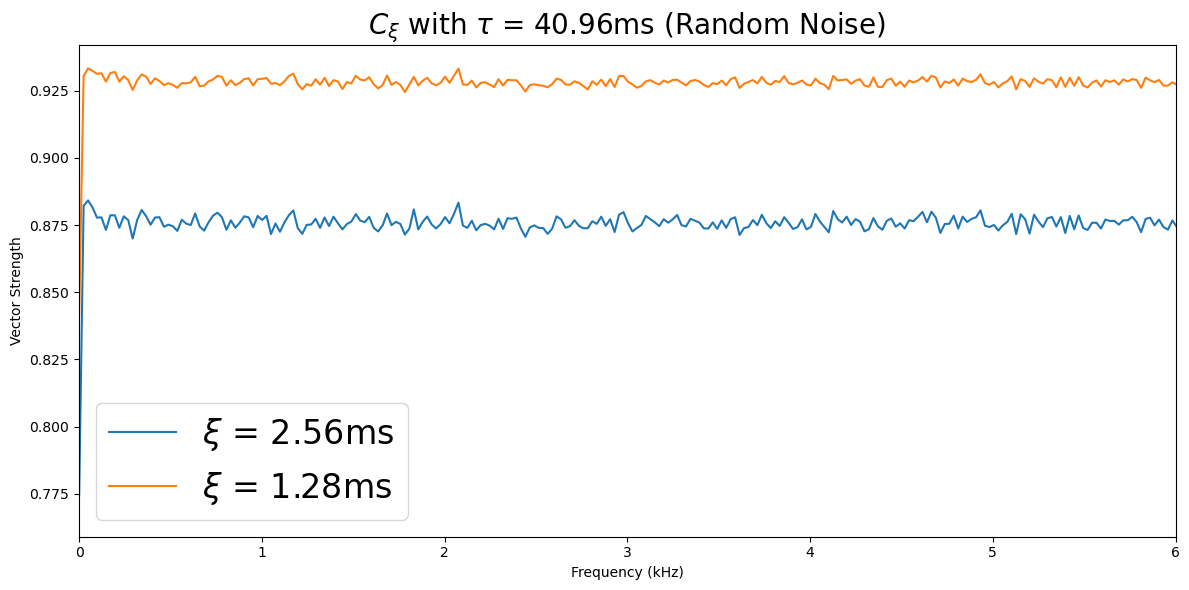

In [ ]:
plt.figure(figsize=(12,6))
plt.title(r"$C_{\xi}$ with "+ r"$\tau$ = " + f"{tau*1000:.2f}ms" + f" (Random Noise)", fontsize=20)
plt.ylabel("Vector Strength", fontsize=18)
plt.xlabel("Frequency (kHz)", fontsize=18)
plt.plot(f/1000, coherence, label=r"$\xi$ = " + f"{xi*1000:.2f}ms")
plt.plot(f/1000, coherence_half_xi, label=r"$\xi$ = " + f"{xi*1000/2:.2f}ms")
plt.legend(fontsize=24)
plt.xlim(0, 6)
plt.tight_layout()
plt.show()

94467
94467
94467
94467


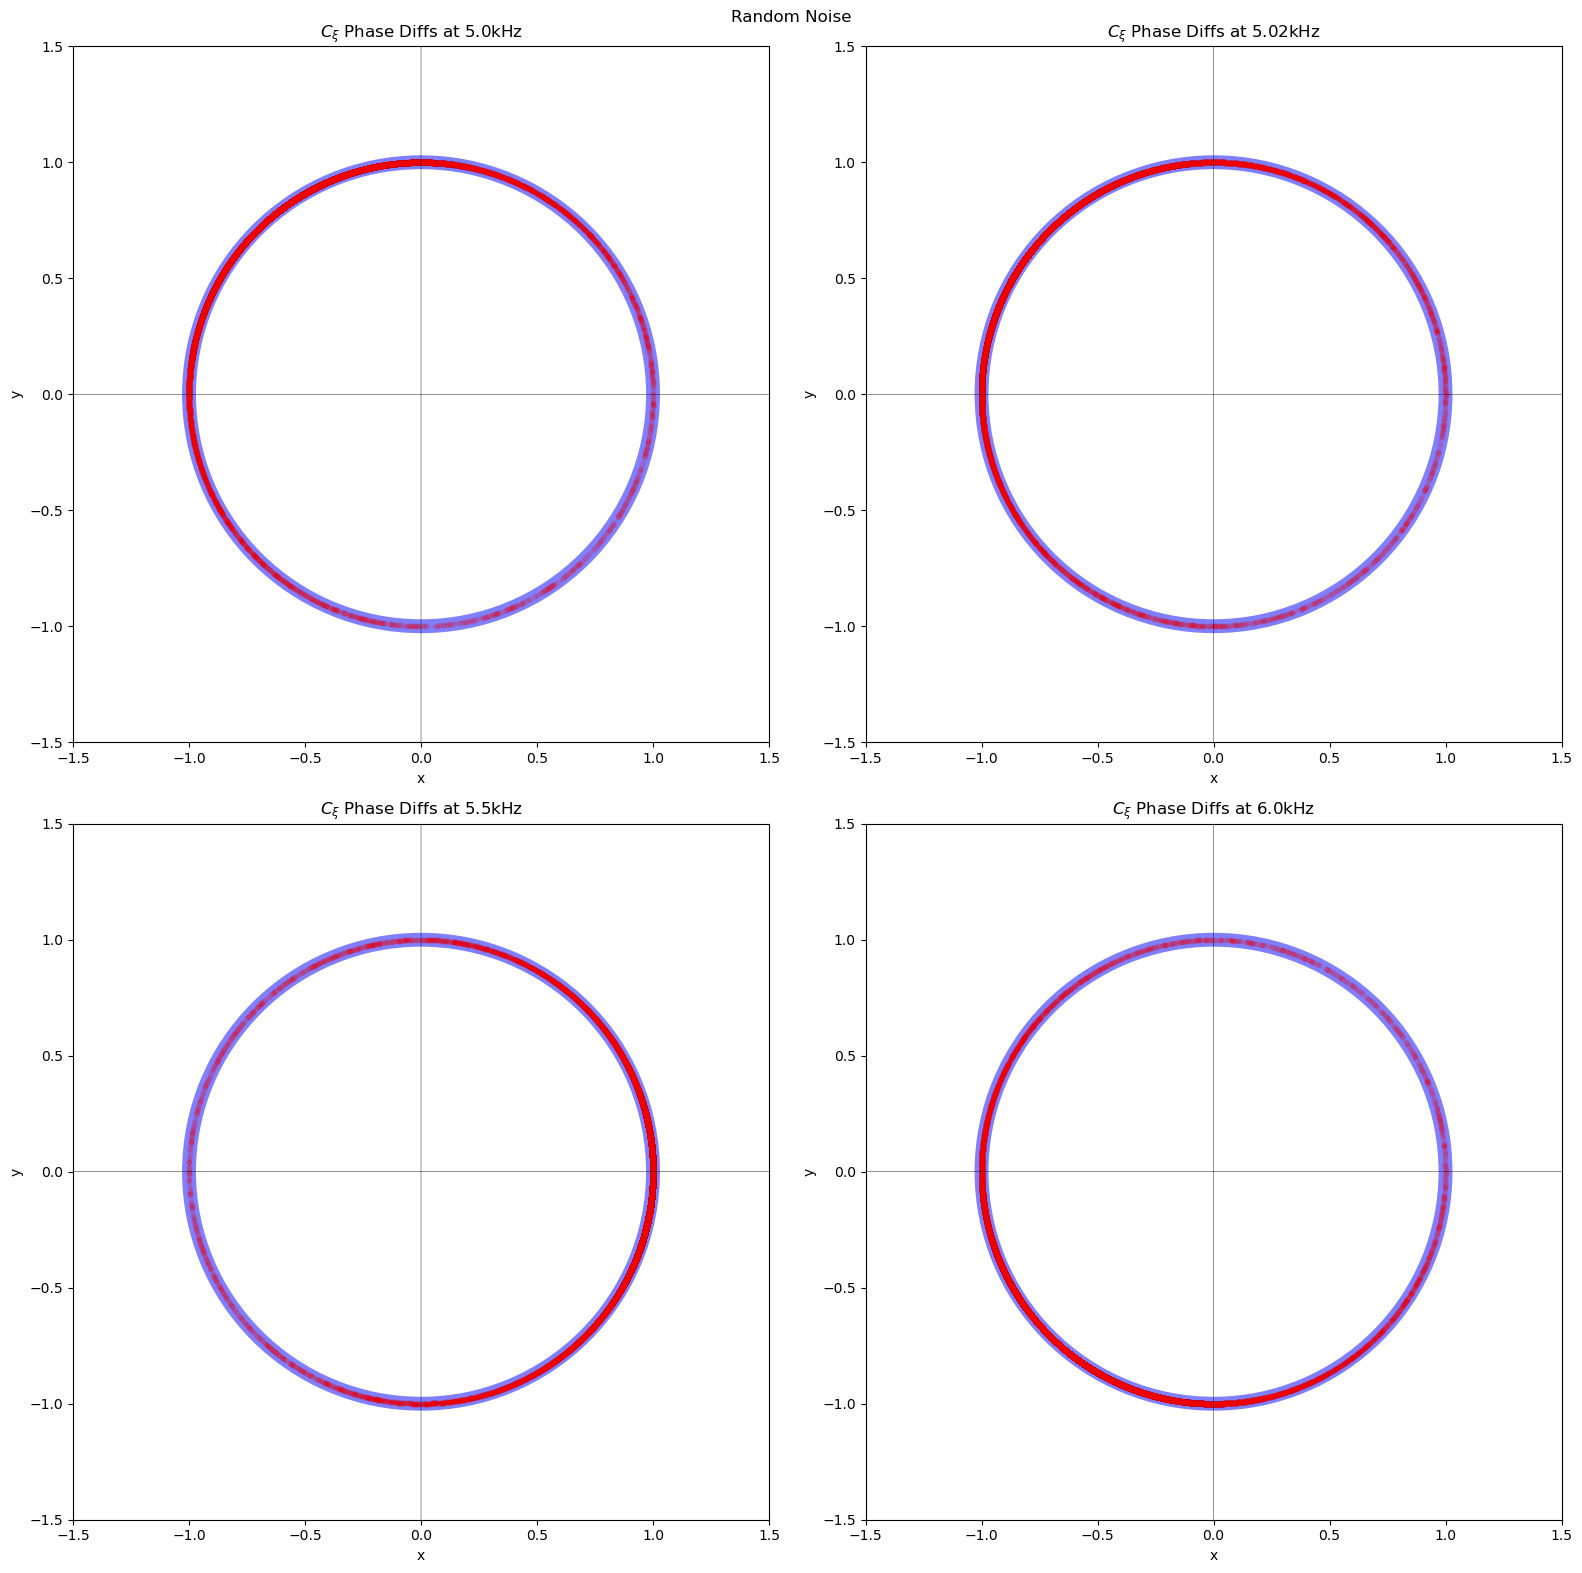

In [79]:
plt.figure(figsize=(16, 16))

phase_diffs_noise = d_noise["phase_diffs"]
# f_min = 5500
# f_max = 5020
for i, f_min in enumerate([5000, 5020, 5500, 6000]):
    f_min_idx = (np.abs(f - f_min)).argmin()  # find index of closest value to f - f_min
    # f_max_idx = (np.abs(f - f_max)).argmin()  # find index of closest value to f - f_max
    angles = phase_diffs_noise[:, f_min_idx].flatten()
    # Compute Cartesian coordinates (x, y) on the unit circle
    x = np.cos(angles)
    y = np.sin(angles)


    # Plot the circle
    circle = plt.Circle((0, 0), 1, color='blue', fill=False, linewidth=10, alpha=0.5)  # Unit circle
    plt.subplot(2, 2, i + 1)
    ax = plt.gca()
    ax.add_patch(circle)

    # Plot the points
    ax.scatter(x, y, color='red', label='Points on Circle', s=10, alpha=0.05)
    ax.plot(np.zeros(len(angles)), np.linspace(-1.5, 1.5, len(angles)), color='black', lw=0.3)
    ax.plot(np.linspace(-1.5, 1.5, len(angles)), np.zeros(len(angles)), color='black', lw=0.3)

    # Set equal scaling so the circle isn't distorted
    ax.set_aspect('equal')

    # Add labels and legend
    ax.set_xlim(-1.5, 1.5)
    ax.set_ylim(-1.5, 1.5)
    ax.set_xlabel('x')
    ax.set_ylabel('y')

    # ax.set_title(r"$C_\xi$ Phase Diffs" + f" from {f_min/1000}kHz to {f_max/1000}kHz")
    ax.set_title(r"$C_\xi$ Phase Diffs" + f" at {f_min/1000}kHz")

# Show the plot
plt.suptitle("Random Noise")
plt.tight_layout()
plt.show()

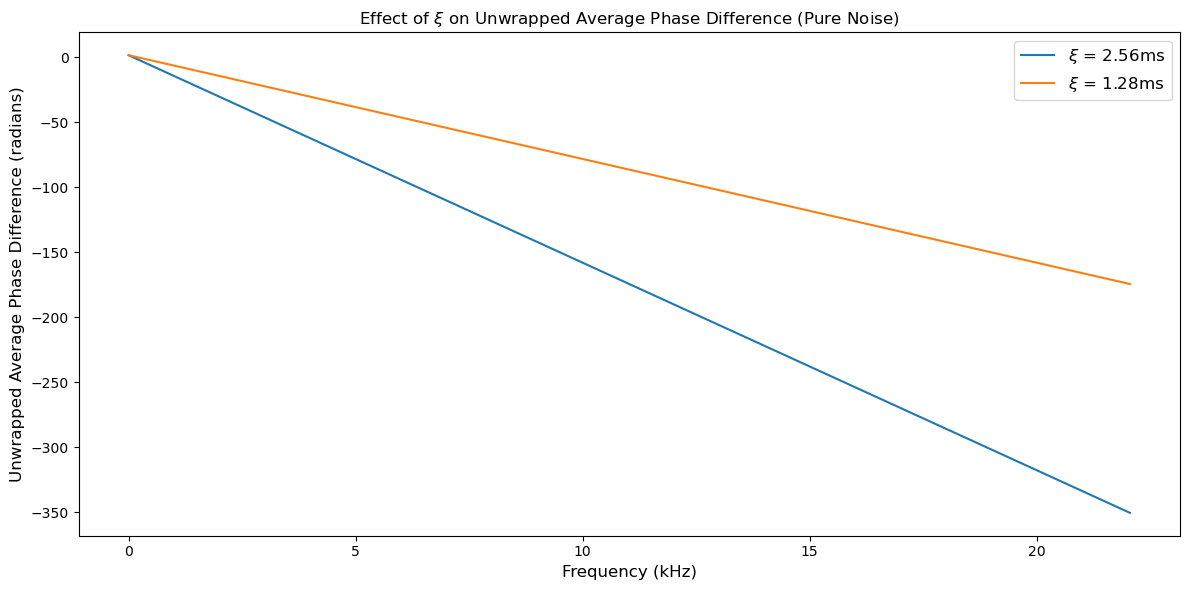

In [98]:
phase_diffs_noise = d_noise["phase_diffs"]
phase_diffs_noise_half_xi = d_noise_half_xi["phase_diffs"]
_, avg_phase_diff_noise = get_avg_vector(phase_diffs_noise)
avg_phase_diff_unwrapped_noise = np.unwrap(avg_phase_diff_noise)
_, avg_phase_diff_noise_half_xi = get_avg_vector(phase_diffs_noise_half_xi)
avg_phase_diff_unwrapped_noise_half_xi = np.unwrap(avg_phase_diff_noise_half_xi)

plt.figure(figsize=(12,6))
plt.plot(f/1000, avg_phase_diff_unwrapped_noise, label = r"$\xi$ = " + f"{xi*1000:.2f}ms")
plt.plot(f/1000, avg_phase_diff_unwrapped_noise_half_xi, label = r"$\xi$ = " + f"{xi*1000/2:.2f}ms")
plt.legend(fontsize=12)
plt.title(r"Effect of $\xi$ on Unwrapped Average Phase Difference (Pure Noise)")
plt.ylabel("Unwrapped Average Phase Difference (radians)", fontsize=12)
plt.xlabel("Frequency (kHz)", fontsize=12)
plt.tight_layout()
plt.show()